In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Lab Session Data.xlsx to Lab Session Data (1).xlsx


In [ ]:
# ML Lab 15/07

# A1

import pandas
import numpy as np

cols=["Customer","Candies (#)","Mangoes (Kg)","Milk Packets (#)","Payment (Rs)"]
fileOpen=pandas.read_excel("Lab Session Data.xlsx",sheet_name="Purchase data",usecols=cols)
fileOpen.head()
A=fileOpen[["Candies (#)","Mangoes (Kg)","Milk Packets (#)"]].values
C=fileOpen[["Payment (Rs)"]].values
print("A : ",A)
print("C : ",C)
print("Dimension of A : ",np.shape(A),"Dimension of C : ",np.shape(C))
print("No of vectors : ",len(fileOpen))
print("Rank of A : ",np.linalg.matrix_rank(A))
inv=np.linalg.pinv(A)
X=inv @ C
print("rate of Candy : ",X[0][0])
print("rate of Mango : ",X[1][0])
print("rate of Milk Pack : ",X[2][0])

A :  [[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
C :  [[386]
 [289]
 [393]
 [110]
 [280]
 [167]
 [271]
 [274]
 [148]
 [198]]
Dimension of A :  (10, 3) Dimension of C :  (10, 1)
No of vectors :  10
Rank of A :  3
rate of Candy :  0.9999999999999989
rate of Mango :  54.99999999999999
rate of Milk Pack :  18.0


In [ ]:
# A2

import pandas
import numpy as np

cols=["Customer","Candies (#)","Mangoes (Kg)","Milk Packets (#)","Payment (Rs)"]
data=pandas.read_excel("Lab Session Data.xlsx",sheet_name="Purchase data",usecols=cols)
data["Customer Type"]=data["Payment (Rs)"].apply(lambda x: "Rich" if x>200 else "Poor")

with pandas.ExcelWriter("Lab Session Data.xlsx",engine="openpyxl",mode="a",if_sheet_exists="replace") as writeToExcel:
  data.to_excel(writeToExcel,sheet_name="Purchase data",index="False")
data.head()

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs),Customer Type
0,C_1,20,6,2,386,Rich
1,C_2,16,3,6,289,Rich
2,C_3,27,6,2,393,Rich
3,C_4,19,1,2,110,Poor
4,C_5,24,4,2,280,Rich


Mean :  1560.663453815261
Var :  58732.365352539186
mean on wednesdays :  1550.706
difference in Mean :  9.957453815261033
mean in april :  1698.9526315789474
diff in mean :  -138.28917776368644
Prob of making loss over stock :  0.4979919678714859
Prob of making profit over stock in Wednesdays:  0.42
Conditional prob of making profit over stock in Wednesdays:  0.42


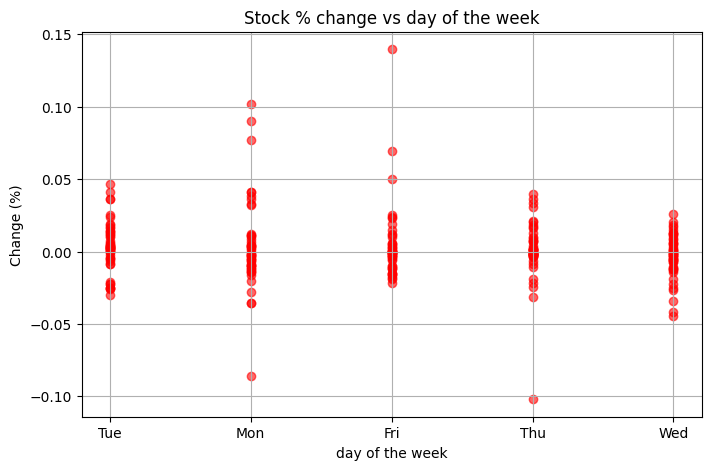

In [ ]:
# A3

import pandas
import statistics
import matplotlib.pyplot as plot

cols=["Date","Month","Day","Price","Open","High","Low","Volume","Chg%"]
data=pandas.read_excel("Lab Session Data.xlsx",sheet_name="IRCTC Stock Price")
mean=statistics.mean(data["Price"])
variance=statistics.variance(data["Price"])
print("Mean : ",mean)
print("Var : ",variance)

Wed_data=data[data["Day"]=="Wed"]
mean_wed=statistics.mean(Wed_data["Price"])
print("mean on wednesdays : ",mean_wed)
print("difference in Mean : ",mean-mean_wed)

Apr_data=data[data["Month"]=="Apr"]
mean_apr=statistics.mean(Apr_data["Price"])
print("mean in april : ",mean_apr)
print("diff in mean : ",mean-mean_apr)

data["Chg%"]=data["Chg%"].astype(str).str.replace("%","").astype(float)
total=len(data)
loss=data[data["Chg%"]<0].shape[0]
prob_loss=loss/total
print("Prob of making loss over stock : ",prob_loss)

wed_profit=Wed_data[Wed_data["Chg%"]>0].shape[0]
wed_total=len(Wed_data)
prob_wed_profit=wed_profit/wed_total
print("Prob of making profit over stock in Wednesdays: ",prob_wed_profit)

if wed_total>0:
  conditional_prob=wed_profit/wed_total
  print("Conditional prob of making profit over stock in Wednesdays: ",conditional_prob)

plot.figure(figsize=(8, 5))
plot.scatter(data["Day"], data["Chg%"], color='red', alpha=0.6)
plot.xlabel("day of the week")
plot.ylabel("Change (%)")
plot.title("Stock % change vs day of the week")
plot.grid(True)
plot.show()

First 5 rows of the dataset:
   Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f    ?            f   ?            f   ?            f 

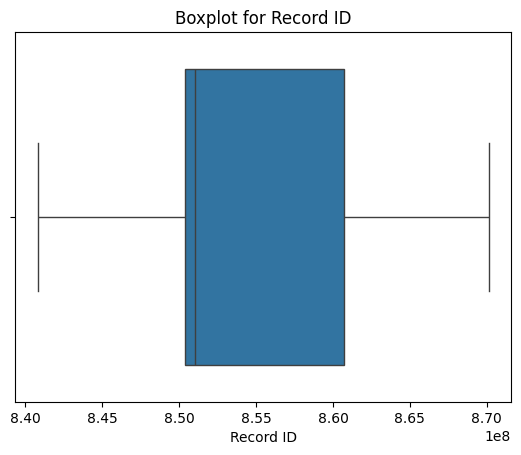

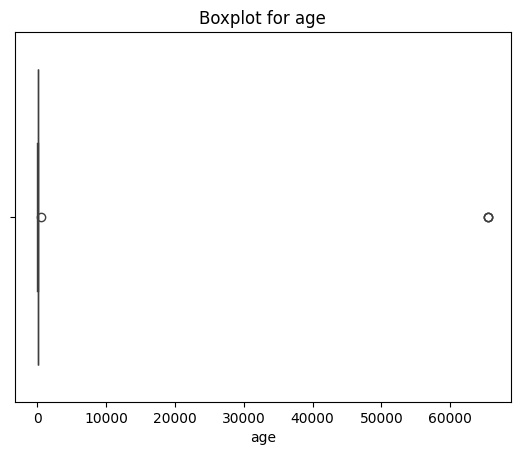


--- Encoding Suggestion ---
sex - Unique values: ['F' 'M' '?']
-> Suggested encoding: One-Hot Encoding (Nominal)

on thyroxine - Unique values: ['f' 't']
-> Suggested encoding: Label Encoding (Ordinal)

query on thyroxine - Unique values: ['f' 't']
-> Suggested encoding: Label Encoding (Ordinal)

on antithyroid medication - Unique values: ['f' 't']
-> Suggested encoding: Label Encoding (Ordinal)

sick - Unique values: ['f' 't']
-> Suggested encoding: Label Encoding (Ordinal)

pregnant - Unique values: ['f' 't']
-> Suggested encoding: Label Encoding (Ordinal)

thyroid surgery - Unique values: ['f' 't']
-> Suggested encoding: Label Encoding (Ordinal)

I131 treatment - Unique values: ['f' 't']
-> Suggested encoding: Label Encoding (Ordinal)

query hypothyroid - Unique values: ['t' 'f']
-> Suggested encoding: One-Hot Encoding (Nominal)

query hyperthyroid - Unique values: ['f' 't']
-> Suggested encoding: Label Encoding (Ordinal)

lithium - Unique values: ['f' 't']
-> Suggested encoding: L

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


file_path = "Lab Session Data.xlsx" # Changed the file path
df = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')


print("First 5 rows of the dataset:")
print(df.head())


print("\n--- Data Info ---")
df.info()


print("\n--- Data Types ---")
print(df.dtypes)


categoriescolumns = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nCategorical Columns: {categoriescolumns}")
print(f"Numeric Columns: {numeric_cols}")


print("\n--- Unique values in categorical columns ---")
for col in categoriescolumns:
    print(f"{col}: {df[col].unique()}")

print("\n--- Missing Values ---")
print(df.isnull().sum())


print("\n--- Summary Statistics for Numeric Columns ---")
print(df[numeric_cols].describe())


print("\n--- Mean and Variance ---")
for col in numeric_cols:
    print(f"{col}: Mean = {df[col].mean():.2f}, Variance = {df[col].var():.2f}")

print("\n--- Boxplots for Outlier Detection ---")
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


print("\n--- Encoding Suggestion ---")
for col in categoriescolumns:
    unique_vals = df[col].unique()
    # Convert unique values to strings before sorting and comparing
    unique_vals_str = [str(val) for val in unique_vals]
    print(f"{col} - Unique values: {unique_vals}")
    print(f"-> Suggested encoding: {'Label Encoding (Ordinal)' if sorted(unique_vals_str) == unique_vals_str else 'One-Hot Encoding (Nominal)'}\n")


df_encoded = df.copy()
le = LabelEncoder()
for col in categoriescolumns:
    df_encoded[col] = le.fit_transform(df[col].astype(str))

print("\n--- Encoded Data Sample ---")
print(df_encoded.head())

In [ ]:
# A4

import pandas
import matplotlib.pyplot as plot
import seaborn
from sklearn.preprocessing import LabelEncoder


data=pandas.read_excel("Lab Session Data.xlsx",sheet_name="thyroid0387_UCI")

# attributes and associated values
print("attributes and associated values")
data.info()

# missing values
data.isnull().sum()

# normal using label and one-hot encoding
for col in data.columns:
    if data[col].dtype == object:
        data[col] = data[col].astype(str)
        data[col] = data[col].replace('?', pandas.NA)
        data[col] = data[col].fillna('Missing')
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

nominal_columns=["on thyroxine","query on thyroxine","on antithyroid medication","sick","pregnant","thyroid surgery","I131 treatment","query hypothyroid","query hyperthyroid","lithium","goitre","tumor","hypopituitary","psych","TSH measured","T3 measured","TT4 measured","T4U measured","FTI measured","TBG measured"]
data=pandas.get_dummies(data,columns=nominal_columns)

# Data range
data.describe()

data.head()

columns=["TSH","T3","TT4","T4U","FTI","TBG"]

# findin Outliers using Interquartile Range (IQR)
def find_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

outlier_summary = {}
for col in columns:
    outliers = find_outliers(data, col)
    outlier_summary[col] = {
        'Number of outlier rows': len(outliers),
        'Row indices where Outliers are present': outliers.index.tolist()
    }
print("Outliers details : ")
print(outlier_summary)

# mean and variance of numeric features
for c in columns:
  print("\nMean of ",c," : ",statistics.mean(data[c]))
  print("Variance of ",c," : ",statistics.variance(data[c]))
  print("Standard Deviation of ",c," : ",statistics.stdev(data[c]))

attributes and associated values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Record ID                  9172 non-null   int64 
 1   age                        9172 non-null   int64 
 2   sex                        9172 non-null   object
 3   on thyroxine               9172 non-null   object
 4   query on thyroxine         9172 non-null   object
 5   on antithyroid medication  9172 non-null   object
 6   sick                       9172 non-null   object
 7   pregnant                   9172 non-null   object
 8   thyroid surgery            9172 non-null   object
 9   I131 treatment             9172 non-null   object
 10  query hypothyroid          9172 non-null   object
 11  query hyperthyroid         9172 non-null   object
 12  lithium                    9172 non-null   object
 13  goitre                     917

In [ ]:
# A5

import pandas

data=pandas.read_excel("Lab Session Data.xlsx",sheet_name="thyroid0387_UCI")

binary_cols = [
    'on thyroxine', 'query on thyroxine', 'on antithyroid medication',
    'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid',
    'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych',
    'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured',
    'FTI measured', 'TBG measured'
]

data_binary = data[binary_cols].replace({'t': 1, 'f': 0})

v1 = data_binary.iloc[0].values
v2 = data_binary.iloc[1].values

f11 = ((v1 == 1) & (v2 == 1)).sum()
f00 = ((v1 == 0) & (v2 == 0)).sum()
f10 = ((v1 == 1) & (v2 == 0)).sum()
f01 = ((v1 == 0) & (v2 == 1)).sum()

JC = f11 / (f01 + f10 + f11)
SMC = (f11 + f00) / (f11 + f00 + f10 + f01)

print("Jaccard Coefficient : ",JC)
print("Simple Matching Coefficient : ",SMC)


Jaccard Coefficient :  0.25
Simple Matching Coefficient :  0.85


/tmp/ipython-input-25-2518454470.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_binary = data[binary_cols].replace({'t': 1, 'f': 0})


In [ ]:
# A6

import pandas
from sklearn.metrics.pairwise import cosine_similarity

sheets=["Purchase data","IRCTC Stock Price","thyroid0387_UCI","marketing_campaign"]
for sheet in sheets:
  data=pandas.read_excel("Lab Session Data.xlsx",sheet_name=sheet)
  features_taken=data.select_dtypes(include=["number"])
  features_filled = features_taken.fillna(0)
  vector1 = features_filled.iloc[0].values.reshape(1, -1)
  vector2 = features_filled.iloc[1].values.reshape(1, -1)
  similarity_matrix = cosine_similarity(vector1,vector2)
  print("\ncosine similarity measure for : ",sheet)
  print("\ncosine similarity matrix:", similarity_matrix)
  print("\ncosine similarity (C1 vs C2):", similarity_matrix[0][0])


cosine similarity measure for :  Purchase data

cosine similarity matrix: [[0.99985355]]

cosine similarity (C1 vs C2): 0.9998535514235412

cosine similarity measure for :  IRCTC Stock Price

cosine similarity matrix: [[0.99999531]]

cosine similarity (C1 vs C2): 0.9999953124225921

cosine similarity measure for :  thyroid0387_UCI

cosine similarity matrix: [[1.]]

cosine similarity (C1 vs C2): 0.9999999999999999

cosine similarity measure for :  marketing_campaign

cosine similarity matrix: [[0.99871368]]

cosine similarity (C1 vs C2): 0.998713682807059



cosine Similarity Measure for :  Purchase data

cosine Similarity for 20 vectors: 0.9998535514235412


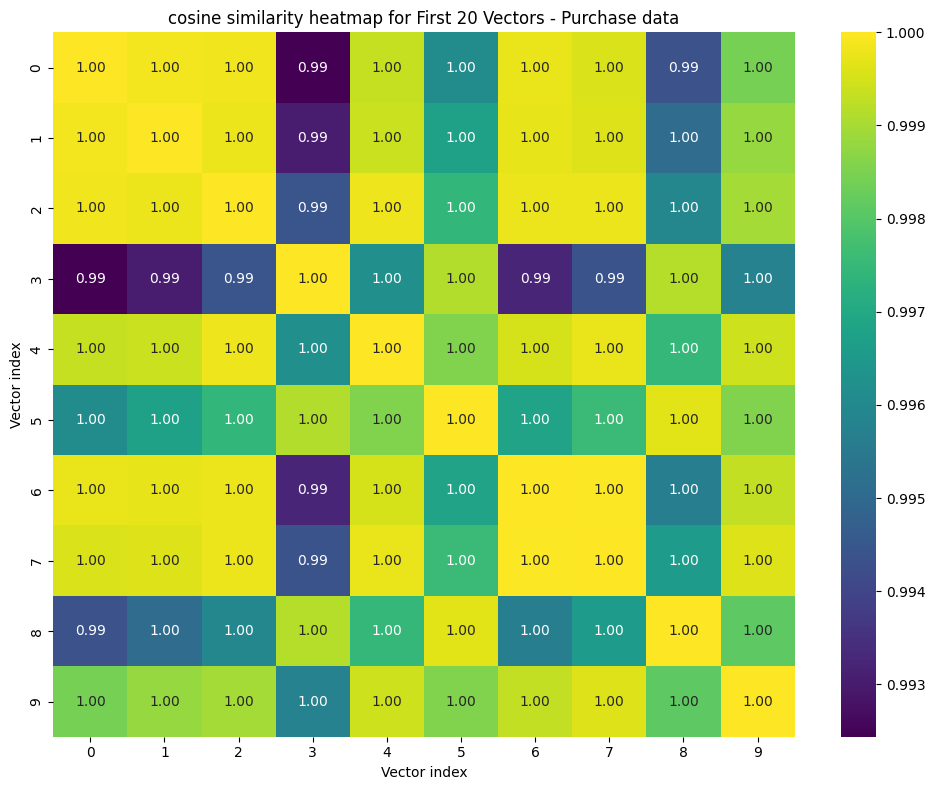


cosine Similarity Measure for :  IRCTC Stock Price

cosine Similarity for 20 vectors: 0.9999953124225923


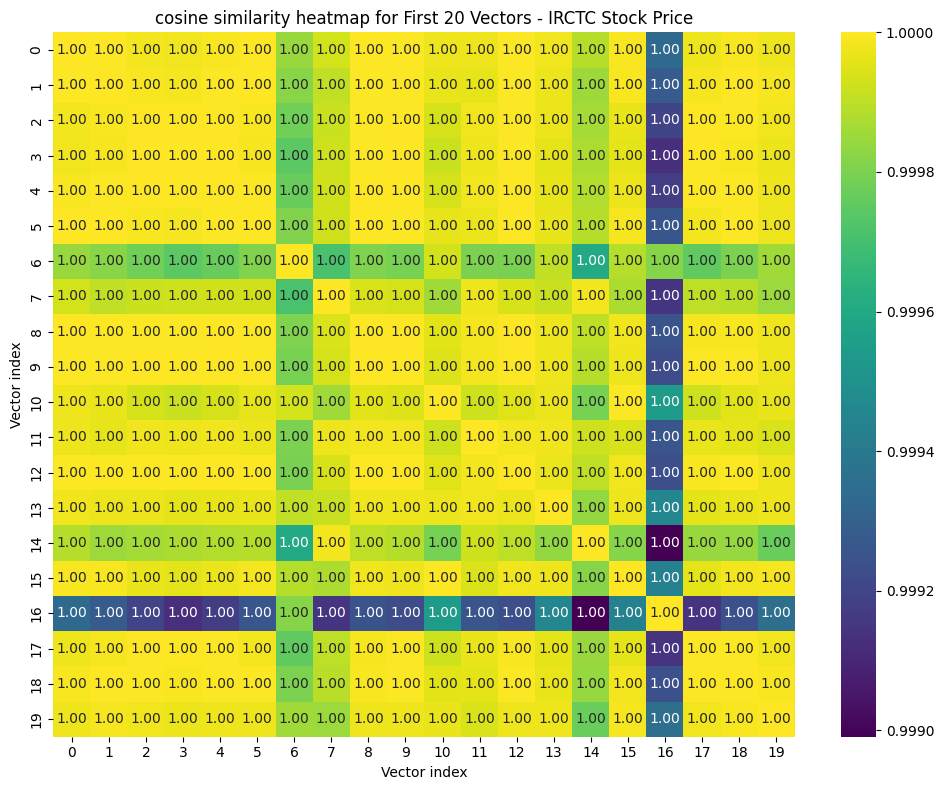


cosine Similarity Measure for :  thyroid0387_UCI

cosine Similarity for 20 vectors: 0.9999999999999999


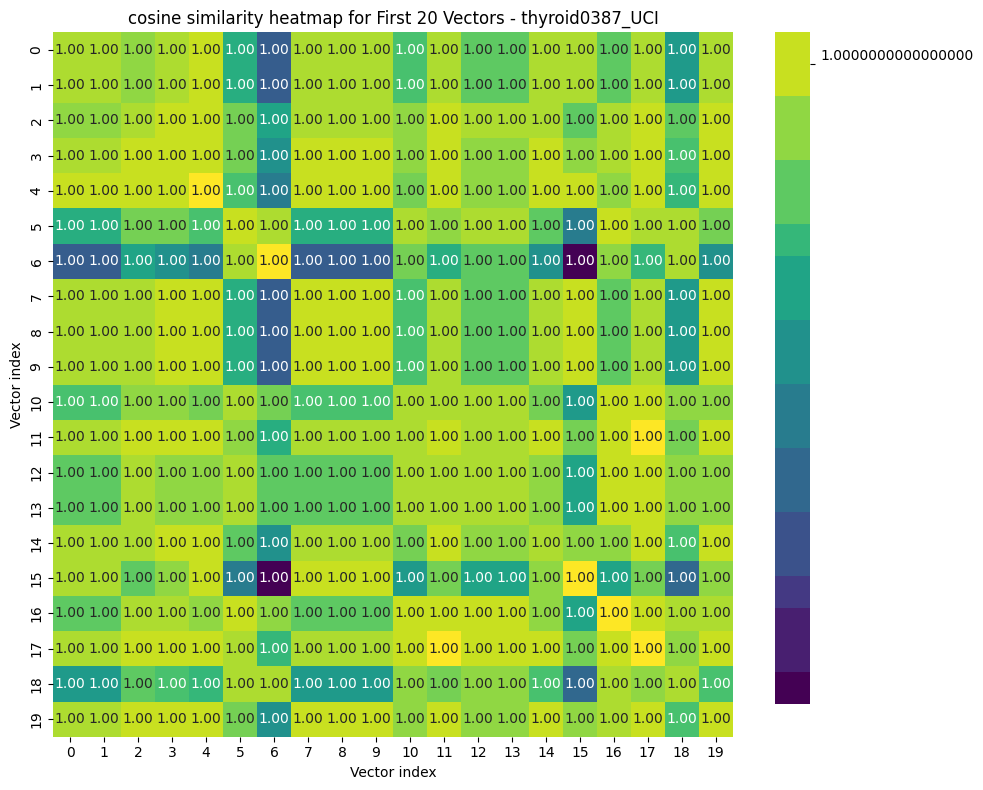


cosine Similarity Measure for :  marketing_campaign

cosine Similarity for 20 vectors: 0.9987136828070589


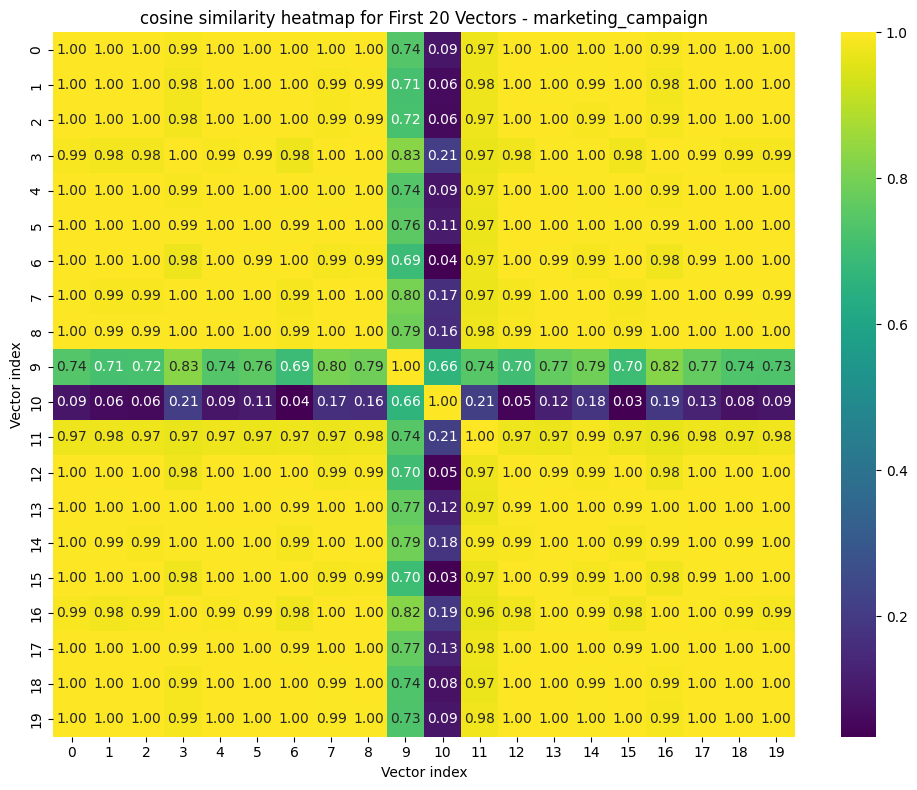

In [ ]:
# A7

import pandas
import seaborn
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plot

sheets=["Purchase data","IRCTC Stock Price","thyroid0387_UCI","marketing_campaign"]
for sheet in sheets:
  data=pandas.read_excel("Lab Session Data.xlsx",sheet_name=sheet)
  features_taken=data.select_dtypes(include=["number"])
  features_filled = features_taken.fillna(0)
  vectors = features_filled.iloc[:20]
  similarity_matrix=cosine_similarity(vectors)
  print("\ncosine Similarity Measure for : ",sheet)
  print("\ncosine Similarity for 20 vectors:", similarity_matrix[0][1])

  plot.figure(figsize=(10, 8))
  seaborn.heatmap(similarity_matrix, cmap='viridis', annot=True, fmt=".2f")
  plot.title(f'cosine similarity heatmap for First 20 Vectors - {sheet}')
  plot.xlabel("Vector index")
  plot.ylabel("Vector index")
  plot.tight_layout()
  plot.show()

In [ ]:
# A8

import pandas
from sklearn.impute import SimpleImputer
import numpy

data = pandas.read_excel("Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")
columns = ["TSH", "T3", "TT4", "T4U", "FTI", "TBG"]

data = data.replace('?', numpy.nan)
for col in columns:
    data[col] = pandas.to_numeric(data[col], errors='coerce')
# Mean imputation
for col in columns:
    mean_imputer = SimpleImputer(strategy='mean')
    data[col] = mean_imputer.fit_transform(data[[col]])  # NOTE: double brackets [[col]] make it 2D
# Median imputation
for col in columns:
    median_imputer = SimpleImputer(strategy='median')
    data[col] = median_imputer.fit_transform(data[[col]])
# Mode imputation
for col in columns:
    mode_imputer = SimpleImputer(strategy='most_frequent')
    data[col] = mode_imputer.fit_transform(data[[col]])
print(data.head())

   Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured         TT4 T4U measured       T4U FTI measured         FTI  \
0            f  108.700305            f  0.976056            f  113.640746   
1            t

/tmp/ipython-input-28-1782531134.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace('?', numpy.nan)


In [ ]:
# A9

import pandas
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

data1=pandas.read_excel("Lab Session Data.xlsx",sheet_name="thyroid0387_UCI")
data1 = data1.replace('?', numpy.nan)

# Min-Max Norm
scaler = MinMaxScaler()
data1[["TSH", "T3", "TT4", "T4U", "FTI", "TBG"]] = scaler.fit_transform(data1[["TSH", "T3", "TT4", "T4U", "FTI", "TBG"]])
data1.head()

data2=pandas.read_excel("Lab Session Data.xlsx",sheet_name="thyroid0387_UCI")
data2 = data2.replace('?', numpy.nan)

# Z-Score Norma
scaler = StandardScaler()
data2[["TSH", "T3", "TT4", "T4U", "FTI", "TBG"]] = scaler.fit_transform(data2[["TSH", "T3", "TT4", "T4U", "FTI", "TBG"]])
data2.head()

/tmp/ipython-input-29-3412808615.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data1 = data1.replace('?', numpy.nan)
/tmp/ipython-input-29-3412808615.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data2 = data2.replace('?', numpy.nan)


,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,NaN,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,0.514377,f,NaN,f,NaN,f,NaN,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,-0.896428,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,-0.183848,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,0.291205,other,S


In [ ]:
# A9

import pandas
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

data1=pandas.read_excel("Lab Session Data.xlsx",sheet_name="thyroid0387_UCI")
data1 = data1.replace('?', numpy.nan)

# Min-Max Norm
scaler = MinMaxScaler()
data1[["TSH", "T3", "TT4", "T4U", "FTI", "TBG"]] = scaler.fit_transform(data1[["TSH", "T3", "TT4", "T4U", "FTI", "TBG"]])
data1.head()

data2=pandas.read_excel("Lab Session Data.xlsx",sheet_name="thyroid0387_UCI")
data2 = data2.replace('?', numpy.nan)

# Z-Score Norma
scaler = StandardScaler()
data2[["TSH", "T3", "TT4", "T4U", "FTI", "TBG"]] = scaler.fit_transform(data2[["TSH", "T3", "TT4", "T4U", "FTI", "TBG"]])
data2.head()